# Traitement des valeurs manquantes

## Libraries à importer

In [1]:
library("tidyverse")
#install.packages("FactoMineR")
library(FactoMineR)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

## Variables globales

In [57]:
#DATA_PATH="D://Jaime//Projet//QAIR//Data//Prepared//"
DATA_PATH<-"C://Formation IA//CEPE//Projet//QAIR//Data//Prepared//"
DATA_FILE_IN<-"data_model_restant_trous.csv"
DATA_FILE_OUT<-"data_model.csv"
DATA_FILE_OUT_RF<-"data_model_clean.csv"
DATA_FILE_OUT_PCA<-"data_model_PCA"
DATA_FILE_OUT_CLEAN<-"data_model_RF"

## Lecture des données

D'abord, nous allons récupérer les données prépares suite au travail d'exploration et préparation des données.

In [3]:
fichier_donnees<-paste(DATA_PATH,DATA_FILE_IN,sep="")
df<-read.csv(fichier_donnees)

bien lu?

In [4]:
df

X     Index Date_Heure_Locale   Heure_Local Timestamp           Annee
1      1     1    2013-01-01 01:00:00  1          2013-01-01 00:00:00 2013 
2      2     2    2013-01-01 02:00:00  2          2013-01-01 01:00:00 2013 
3      3     3    2013-01-01 03:00:00  3          2013-01-01 02:00:00 2013 
4      4     4    2013-01-01 04:00:00  4          2013-01-01 03:00:00 2013 
5      5     5    2013-01-01 05:00:00  5          2013-01-01 04:00:00 2013 
6      6     6    2013-01-01 06:00:00  6          2013-01-01 05:00:00 2013 
7      7     7    2013-01-01 07:00:00  7          2013-01-01 06:00:00 2013 
8      8     8    2013-01-01 08:00:00  8          2013-01-01 07:00:00 2013 
9      9     9    2013-01-01 09:00:00  9          2013-01-01 08:00:00 2013 
10    10    10    2013-01-01 10:00:00 10          2013-01-01 09:00:00 2013 
11    11    11    2013-01-01 11:00:00 11          2013-01-01 10:00:00 2013 
12    12    12    2013-01-01 12:00:00 12          2013-01-01 11:00:00 2013 
13    13    13    2013-01-01 13:00:00 13          2013-01-01 12:00:00 2013 
14    14    14    2013-01-01 14:00:00 14          2013-01-01 13:00:00 2013 
15    15    15    2013-01-01 15:00:00 15          2013-01-01 14:00:00 2013 
16    16    16    2013-01-01 16:00:00 16          2013-01-01 15:00:00 2013 
17    17    17    2013-01-01 17:00:00 17          2013-01-01 16:00:00 2013 
18    18    18    2013-01-01 18:00:00 18          2013-01-01 17:00:00 2013 
19    19    19    2013-01-01 19:00:00 19          2013-01-01 18:00:00 2013 
20    20    20    2013-01-01 20:00:00 20          2013-01-01 19:00:00 2013 
21    21    21    2013-01-01 21:00:00 21          2013-01-01 20:00:00 2013 
22    22    22    2013-01-01 22:00:00 22          2013-01-01 21:00:00 2013 
23    23    23    2013-01-01 23:00:00 23          2013-01-01 22:00:00 2013 
24    24    24    2013-01-02 00:00:00  0          2013-01-01 23:00:00 2013 
25    25    25    2013-01-02 01:00:00  1          2013-01-02 00:00:00 2013 
26    26    26    2013-01-02 02:00:00  2          2013-01-02 01:00:00 2013 
27    27    27    2013-01-02 03:00:00  3          2013-01-02 02:00:00 2013 
28    28    28    2013-01-02 04:00:00  4          2013-01-02 03:00:00 2013 
29    29    29    2013-01-02 05:00:00  5          2013-01-02 04:00:00 2013 
30    30    30    2013-01-02 06:00:00  6          2013-01-02 05:00:00 2013 
...   ...   ...   ...                 ...         ...                 ...  
70123 70123 70123 2020-12-31 19:00:00 19          2020-12-31 18:00:00 2020 
70124 70124 70124 2020-12-31 20:00:00 20          2020-12-31 19:00:00 2020 
70125 70125 70125 2020-12-31 21:00:00 21          2020-12-31 20:00:00 2020 
70126 70126 70126 2020-12-31 22:00:00 22          2020-12-31 21:00:00 2020 
70127 70127 70127 2020-12-31 23:00:00 23          2020-12-31 22:00:00 2020 
70128 70128 70128 2021-01-01 00:00:00  0          2020-12-31 23:00:00 2020 
70129 70129 70129 2021-01-01 01:00:00  1          2021-01-01 00:00:00 2021 
70130 70130 70130 2021-01-01 02:00:00  2          2021-01-01 01:00:00 2021 
70131 70131 70131 2021-01-01 03:00:00  3          2021-01-01 02:00:00 2021 
70132 70132 70132 2021-01-01 04:00:00  4          2021-01-01 03:00:00 2021 
70133 70133 70133 2021-01-01 05:00:00  5          2021-01-01 04:00:00 2021 
70134 70134 70134 2021-01-01 06:00:00  6          2021-01-01 05:00:00 2021 
70135 70135 70135 2021-01-01 07:00:00  7          2021-01-01 06:00:00 2021 
70136 70136 70136 2021-01-01 08:00:00  8          2021-01-01 07:00:00 2021 
70137 70137 70137 2021-01-01 09:00:00  9          2021-01-01 08:00:00 2021 
70138 70138 70138 2021-01-01 10:00:00 10          2021-01-01 09:00:00 2021 
70139 70139 70139 2021-01-01 11:00:00 11          2021-01-01 10:00:00 2021 
70140 70140 70140 2021-01-01 12:00:00 12          2021-01-01 11:00:00 2021 
70141 70141 70141 2021-01-01 13:00:00 13          2021-01-01 12:00:00 2021 
70142 70142 70142 2021-01-01 14:00:00 14          2021-01-01 13:00:00 2021 
70143 70143 70143 2021-01-01 15:00:00 15          2021

In [5]:
df$X<-NULL

## Identifier les trous

Function qui serve à identifier les trous pour chacune des variables

In [6]:
trouver_trous <- function(df,var_name,sup_24=FALSE,sup_N=0) 
{    
    #matrix support
    C02trousMatrix<-data.frame(date_heure=NA,date=NA,heure=NA,taille=NA)   
    #identifier les trous
    co2trous<-df[is.na(df[var_name]),c("Date_Heure_Locale",var_name)]
    #index de registres et son prédécesseur des trous
    inds<-seq_len(nrow(co2trous))
    inds2<-c(inds[-1],inds[1])
    #Valeur différent avec le registre consecutive dans l'ensemble de trous?
    co2trous$dist_next<-as.numeric(row.names(co2trous[inds2,]))-as.numeric(row.names(co2trous[inds,]))
    co2trous[co2trous["dist_next"]!=1,"dist_next"]<-0
    #Identification des premiers registres de chaque bloque de NAs
    dfaux=data.frame(co2trous[inds,"dist_next"],co2trous[inds2,"dist_next"])
    co2trous[inds2,"first_NA_block"]<-(co2trous[inds2,"dist_next"]==1 & co2trous[inds,"dist_next"]==0)
    #Taille de nombre de registres consecutives ayant de NA's 
    a<-rle(co2trous$dist_next)$lengths
    a<-a[rle(co2trous$dist_next)$values==1]
    co2trous[co2trous["first_NA_block"]==TRUE,"size_trou"]<-a
    co2trous[co2trous["first_NA_block"]==TRUE,"size_trou_day"]<-co2trous[co2trous["first_NA_block"]==TRUE,"size_trou"] / 24
    co2trous<-co2trous[co2trous["first_NA_block"]==TRUE,]
    if (sup_24==TRUE)
    {
        co2trous<-co2trous[co2trous["first_NA_block"]==TRUE & co2trous["size_trou"]>24,]
    }
    else (sup_N>0)
    {        
        co2trous<-co2trous[co2trous["first_NA_block"]==TRUE & co2trous["size_trou"]>sup_N,]
    }
    return (co2trous[,!names(co2trous) %in% c("dist_next","first_NA_block")])
}

### Cible : CO2

In [7]:
data_f<-trouver_trous(df,"co2",FALSE)
print(data_f)

        Date_Heure_Locale co2 size_trou size_trou_day
387   2013-01-17 03:00:00  NA         1    0.04166667
1252  2013-02-22 04:00:00  NA        80    3.33333333
3039  2013-05-07 09:00:00  NA        17    0.70833333
3600  2013-05-31 01:00:00  NA         1    0.04166667
3939  2013-06-14 04:00:00  NA        10    0.41666667
4022  2013-06-17 15:00:00  NA       696   29.00000000
4998  2013-07-28 07:00:00  NA         4    0.16666667
5020  2013-07-29 05:00:00  NA         3    0.12500000
5041  2013-07-30 02:00:00  NA         7    0.29166667
5066  2013-07-31 03:00:00  NA         4    0.16666667
5139  2013-08-03 04:00:00  NA        11    0.45833333
5161  2013-08-04 02:00:00  NA        13    0.54166667
5185  2013-08-05 02:00:00  NA         7    0.29166667
5194  2013-08-05 11:00:00  NA        71    2.95833333
5309  2013-08-10 06:00:00  NA         4    0.16666667
5332  2013-08-11 05:00:00  NA         1    0.04166667
5378  2013-08-13 03:00:00  NA         5    0.20833333
5401  2013-08-14 02:00:00  N

In [8]:
data_f<-trouver_trous(df,"co2",TRUE)
print(data_f)

        Date_Heure_Locale co2 size_trou size_trou_day
1252  2013-02-22 04:00:00  NA        80      3.333333
4022  2013-06-17 15:00:00  NA       696     29.000000
5194  2013-08-05 11:00:00  NA        71      2.958333
5664  2013-08-25 00:00:00  NA        39      1.625000
9627  2014-02-06 03:00:00  NA       155      6.458333
10499 2014-03-14 11:00:00  NA       100      4.166667
14138 2014-08-13 03:00:00  NA        31      1.291667
14340 2014-08-21 13:00:00  NA       137      5.708333
24808 2015-10-31 04:00:00  NA        57      2.375000
28512 2016-04-03 01:00:00  NA        40      1.666667
30342 2016-06-18 07:00:00  NA        75      3.125000
31302 2016-07-28 07:00:00  NA        27      1.125000
33216 2016-10-16 01:00:00  NA        40      1.666667
33588 2016-10-31 02:00:00  NA        58      2.416667
34251 2016-11-28 03:00:00  NA        29      1.208333
34882 2016-12-24 10:00:00  NA        46      1.916667
40202 2017-08-03 03:00:00  NA       130      5.416667
43606 2017-12-22 22:00:00  N

### Météo (infos interpolés) :  pluie_3_heures ... nebulosite_totale

In [9]:
data_f<-trouver_trous(df,"nebulosite_totale",FALSE)
print(data_f)

        Date_Heure_Locale nebulosite_totale size_trou size_trou_day
65711 2020-07-01 00:00:00                NA      4441      185.0417


Comme ils ont été interpolés, pas besoin de les traiter.

### RATP : temperature

In [10]:
data_f<-trouver_trous(df,"temperature",FALSE)
print(data_f)

        Date_Heure_Locale temperature size_trou size_trou_day
3039  2013-05-07 09:00:00          NA        17    0.70833333
4022  2013-06-17 15:00:00          NA       695   28.95833333
4947  2013-07-26 04:00:00          NA       108    4.50000000
7425  2013-11-06 09:00:00          NA        16    0.66666667
8287  2013-12-12 07:00:00          NA        18    0.75000000
8307  2013-12-13 03:00:00          NA         3    0.12500000
9627  2014-02-06 03:00:00          NA        22    0.91666667
9651  2014-02-07 03:00:00          NA        12    0.50000000
10325 2014-03-07 05:00:00          NA        99    4.12500000
18961 2015-03-02 01:00:00          NA        86    3.58333333
19203 2015-03-12 03:00:00          NA       156    6.50000000
21170 2015-06-02 03:00:00          NA         2    0.08333333
25616 2015-12-04 08:00:00          NA         1    0.04166667
33414 2016-10-24 03:00:00          NA         1    0.04166667
33423 2016-10-24 12:00:00          NA         6    0.25000000
33513 20

In [11]:
data_f<-trouver_trous(df,"temperature",TRUE)
print(data_f)

        Date_Heure_Locale temperature size_trou size_trou_day
4022  2013-06-17 15:00:00          NA       695     28.958333
4947  2013-07-26 04:00:00          NA       108      4.500000
10325 2014-03-07 05:00:00          NA        99      4.125000
18961 2015-03-02 01:00:00          NA        86      3.583333
19203 2015-03-12 03:00:00          NA       156      6.500000
40202 2017-08-03 03:00:00          NA       130      5.416667
43606 2017-12-22 22:00:00          NA        50      2.083333
45733 2018-03-21 13:00:00          NA       386     16.083333


### RATP : no

In [12]:
data_f<-trouver_trous(df,"no",FALSE)
print(data_f)

        Date_Heure_Locale no size_trou size_trou_day
365   2013-01-16 05:00:00 NA         1    0.04166667
387   2013-01-17 03:00:00 NA         1    0.04166667
732   2013-01-31 12:00:00 NA       162    6.75000000
1093  2013-02-15 13:00:00 NA       160    6.66666667
1707  2013-03-13 02:00:00 NA         3    0.12500000
1732  2013-03-14 03:00:00 NA       200    8.33333333
1973  2013-03-24 05:00:00 NA         3    0.12500000
1991  2013-03-24 23:00:00 NA         7    0.29166667
2017  2013-03-26 01:00:00 NA         5    0.20833333
2041  2013-03-27 01:00:00 NA         5    0.20833333
2089  2013-03-29 01:00:00 NA         5    0.20833333
2097  2013-03-29 09:00:00 NA       172    7.16666667
2308  2013-04-07 05:00:00 NA         5    0.20833333
2315  2013-04-07 12:00:00 NA         1    0.04166667
2329  2013-04-08 02:00:00 NA         3    0.12500000
2354  2013-04-09 03:00:00 NA         2    0.08333333
2379  2013-04-10 04:00:00 NA         2    0.08333333
2426  2013-04-12 03:00:00 NA       321   13.37

In [13]:
data_f<-trouver_trous(df,"no",TRUE)
print(data_f)

        Date_Heure_Locale no size_trou size_trou_day
732   2013-01-31 12:00:00 NA       162      6.750000
1093  2013-02-15 13:00:00 NA       160      6.666667
1732  2013-03-14 03:00:00 NA       200      8.333333
2097  2013-03-29 09:00:00 NA       172      7.166667
2426  2013-04-12 03:00:00 NA       321     13.375000
2936  2013-05-03 04:00:00 NA       318     13.250000
4022  2013-06-17 15:00:00 NA       766     31.916667
5124  2013-08-02 13:00:00 NA       243     10.125000
6526  2013-09-29 23:00:00 NA       112      4.666667
9657  2014-02-07 09:00:00 NA       125      5.208333
21026 2015-05-27 03:00:00 NA        57      2.375000
24275 2015-10-09 12:00:00 NA       169      7.041667
30996 2016-07-15 13:00:00 NA        72      3.000000
34696 2016-12-16 16:00:00 NA       115      4.791667
37647 2017-04-18 10:00:00 NA        34      1.416667
38602 2017-05-28 11:00:00 NA        27      1.125000
40202 2017-08-03 03:00:00 NA       130      5.416667
43370 2017-12-13 02:00:00 NA       205      8.

### RATP : no2

In [14]:
data_f<-trouver_trous(df,"no2",FALSE)
print(data_f)

        Date_Heure_Locale no2 size_trou size_trou_day
387   2013-01-17 03:00:00  NA         1    0.04166667
732   2013-01-31 12:00:00  NA       157    6.54166667
1093  2013-02-15 13:00:00  NA       160    6.66666667
1732  2013-03-14 03:00:00  NA       200    8.33333333
2097  2013-03-29 09:00:00  NA       172    7.16666667
2426  2013-04-12 03:00:00  NA       321   13.37500000
2936  2013-05-03 04:00:00  NA       318   13.25000000
3600  2013-05-31 01:00:00  NA         1    0.04166667
3949  2013-06-14 14:00:00  NA         1    0.04166667
4022  2013-06-17 15:00:00  NA       766   31.91666667
4859  2013-07-22 12:00:00  NA         1    0.04166667
4947  2013-07-26 04:00:00  NA         1    0.04166667
5124  2013-08-02 13:00:00  NA       243   10.12500000
5595  2013-08-22 03:00:00  NA         8    0.33333333
6526  2013-09-29 23:00:00  NA       112    4.66666667
7425  2013-11-06 09:00:00  NA        16    0.66666667
8287  2013-12-12 07:00:00  NA        18    0.75000000
8307  2013-12-13 03:00:00  N

In [15]:
data_f<-trouver_trous(df,"no2",TRUE)
print(data_f)

        Date_Heure_Locale no2 size_trou size_trou_day
732   2013-01-31 12:00:00  NA       157      6.541667
1093  2013-02-15 13:00:00  NA       160      6.666667
1732  2013-03-14 03:00:00  NA       200      8.333333
2097  2013-03-29 09:00:00  NA       172      7.166667
2426  2013-04-12 03:00:00  NA       321     13.375000
2936  2013-05-03 04:00:00  NA       318     13.250000
4022  2013-06-17 15:00:00  NA       766     31.916667
5124  2013-08-02 13:00:00  NA       243     10.125000
6526  2013-09-29 23:00:00  NA       112      4.666667
9657  2014-02-07 09:00:00  NA       125      5.208333
21026 2015-05-27 03:00:00  NA        57      2.375000
24275 2015-10-09 12:00:00  NA       169      7.041667
30996 2016-07-15 13:00:00  NA        72      3.000000
34696 2016-12-16 16:00:00  NA       115      4.791667
37647 2017-04-18 10:00:00  NA        34      1.416667
38602 2017-05-28 11:00:00  NA        27      1.125000
40202 2017-08-03 03:00:00  NA       130      5.416667
43370 2017-12-13 02:00:00  N

### RATP : humidite

In [16]:
data_f<-trouver_trous(df,"humidite",FALSE)
print(data_f)

        Date_Heure_Locale humidite size_trou size_trou_day
3039  2013-05-07 09:00:00       NA        17    0.70833333
4022  2013-06-17 15:00:00       NA       695   28.95833333
4947  2013-07-26 04:00:00       NA       108    4.50000000
7425  2013-11-06 09:00:00       NA        16    0.66666667
8287  2013-12-12 07:00:00       NA        18    0.75000000
8307  2013-12-13 03:00:00       NA         3    0.12500000
9627  2014-02-06 03:00:00       NA        22    0.91666667
9651  2014-02-07 03:00:00       NA        12    0.50000000
10325 2014-03-07 05:00:00       NA        99    4.12500000
11161 2014-04-11 02:00:00       NA         3    0.12500000
13105 2014-07-01 02:00:00       NA         1    0.04166667
17619 2015-01-05 02:00:00       NA         4    0.16666667
18961 2015-03-02 01:00:00       NA        86    3.58333333
19203 2015-03-12 03:00:00       NA       156    6.50000000
21170 2015-06-02 03:00:00       NA         2    0.08333333
25616 2015-12-04 08:00:00       NA         1    0.041666

In [17]:
data_f<-trouver_trous(df,"humidite",TRUE)
print(data_f)

        Date_Heure_Locale humidite size_trou size_trou_day
4022  2013-06-17 15:00:00       NA       695     28.958333
4947  2013-07-26 04:00:00       NA       108      4.500000
10325 2014-03-07 05:00:00       NA        99      4.125000
18961 2015-03-02 01:00:00       NA        86      3.583333
19203 2015-03-12 03:00:00       NA       156      6.500000
40202 2017-08-03 03:00:00       NA       130      5.416667
43606 2017-12-22 22:00:00       NA        50      2.083333
45733 2018-03-21 13:00:00       NA       386     16.083333


### RATP : particules_fines

In [18]:
data_f<-trouver_trous(df,"particules_fines",FALSE)
print(data_f)

        Date_Heure_Locale particules_fines size_trou size_trou_day
309   2013-01-13 21:00:00               NA         1    0.04166667
339   2013-01-15 03:00:00               NA         3    0.12500000
365   2013-01-16 05:00:00               NA         1    0.04166667
387   2013-01-17 03:00:00               NA         4    0.16666667
701   2013-01-30 05:00:00               NA         1    0.04166667
711   2013-01-30 15:00:00               NA         1    0.04166667
1223  2013-02-20 23:00:00               NA         1    0.04166667
1252  2013-02-22 04:00:00               NA         1    0.04166667
1731  2013-03-14 02:00:00               NA         9    0.37500000
2426  2013-04-12 03:00:00               NA         3    0.12500000
2936  2013-05-03 04:00:00               NA         3    0.12500000
3039  2013-05-07 09:00:00               NA        17    0.70833333
3063  2013-05-08 09:00:00               NA         9    0.37500000
3080  2013-05-09 02:00:00               NA         1    0.0416

In [19]:
data_f<-trouver_trous(df,"particules_fines",TRUE)
print(data_f)

        Date_Heure_Locale particules_fines size_trou size_trou_day
4022  2013-06-17 15:00:00               NA       705     29.375000
5621  2013-08-23 05:00:00               NA        83      3.458333
6470  2013-09-27 15:00:00               NA        68      2.833333
21077 2015-05-29 06:00:00               NA        79      3.291667
23523 2015-09-08 04:00:00               NA        32      1.333333
40202 2017-08-03 03:00:00               NA       132      5.500000
43606 2017-12-22 22:00:00               NA        50      2.083333
45733 2018-03-21 13:00:00               NA       386     16.083333
47293 2018-05-25 14:00:00               NA        76      3.166667
50333 2018-09-29 06:00:00               NA        58      2.416667
59499 2019-10-16 04:00:00               NA       113      4.708333
59614 2019-10-20 22:00:00               NA        28      1.166667
59644 2019-10-22 03:00:00               NA        28      1.166667
59674 2019-10-23 08:00:00               NA        28      1.16

### Météo ext : ext_pm25 , ext_pm10, ext_o3, ext_no2

In [20]:
data_f<-trouver_trous(df,"ext_pm25",FALSE)
print(data_f)

        Date_Heure_Locale ext_pm25 size_trou size_trou_day
1     2013-01-01 01:00:00       NA      8759   364.9583333
17450 2014-12-29 01:00:00       NA        71     2.9583333
26258 2015-12-31 01:00:00       NA        47     1.9583333
35353 2017-01-13 01:00:00       NA        71     2.9583333
39025 2017-06-15 02:00:00       NA      2999   124.9583333
52562 2018-12-31 01:00:00       NA        23     0.9583333
61299 2019-12-30 01:00:00       NA        47     1.9583333
63481 2020-03-30 02:00:00       NA        47     1.9583333


In [21]:
data_f<-trouver_trous(df,"ext_pm10",FALSE)
print(data_f)

        Date_Heure_Locale ext_pm10 size_trou size_trou_day
1     2013-01-01 01:00:00       NA      8735   363.9583333
17426 2014-12-28 01:00:00       NA        71     2.9583333
26234 2015-12-30 01:00:00       NA        47     1.9583333
35329 2017-01-12 01:00:00       NA        71     2.9583333
39001 2017-06-14 02:00:00       NA      2999   124.9583333
52538 2018-12-30 01:00:00       NA        23     0.9583333
61275 2019-12-29 01:00:00       NA        47     1.9583333
63457 2020-03-29 01:00:00       NA        47     1.9583333


In [22]:
data_f<-trouver_trous(df,"ext_o3",FALSE)
print(data_f)

        Date_Heure_Locale ext_o3 size_trou size_trou_day
1     2013-01-01 01:00:00     NA      8735  363.95833333
16633 2014-11-25 01:00:00     NA        23    0.95833333
16825 2014-12-03 01:00:00     NA        23    0.95833333
17426 2014-12-28 01:00:00     NA        71    2.95833333
26234 2015-12-30 01:00:00     NA        47    1.95833333
34177 2016-11-25 01:00:00     NA        23    0.95833333
35329 2017-01-12 01:00:00     NA        71    2.95833333
39001 2017-06-14 02:00:00     NA      2999  124.95833333
51625 2018-11-22 01:00:00     NA        23    0.95833333
51697 2018-11-25 01:00:00     NA        23    0.95833333
52441 2018-12-26 01:00:00     NA         2    0.08333333
52445 2018-12-26 04:00:00     NA        20    0.83333333
52538 2018-12-30 01:00:00     NA        23    0.95833333
61275 2019-12-29 01:00:00     NA        47    1.95833333
63457 2020-03-29 01:00:00     NA        47    1.95833333


In [23]:
data_f<-trouver_trous(df,"ext_no2",FALSE)
print(data_f)

        Date_Heure_Locale ext_no2 size_trou size_trou_day
1     2013-01-01 01:00:00      NA      8735   363.9583333
17426 2014-12-28 01:00:00      NA        71     2.9583333
26234 2015-12-30 01:00:00      NA        47     1.9583333
35329 2017-01-12 01:00:00      NA        71     2.9583333
39001 2017-06-14 02:00:00      NA      2999   124.9583333
52538 2018-12-30 01:00:00      NA        23     0.9583333
61275 2019-12-29 01:00:00      NA        47     1.9583333
63457 2020-03-29 01:00:00      NA        47     1.9583333


### ---------------------------------------------------------------------------------------------------------------------------------------------------

## Premier filtre

Nous décidons d'écarter l'année 2013 et 2020 ne serait pas inclus dans le scope de notre étude. 

In [24]:
df_filt1<-df[df$Annee>2013 & df$Annee<2020,]

## Deuxieme filtre

Les trous déjà éxistant dans la cible CO2, nous les supprimons de la source de données.

In [25]:
data_f_co2<-df_filt1%>%filter(!is.na(co2))

In [26]:
df_filt2<-df_filt1[which(!is.na(df_filt1$co2)),]
df_filt2

Index Date_Heure_Locale   Heure_Local Timestamp           Annee Mois
8761  8761  2014-01-01 01:00:00  1          2014-01-01 00:00:00 2014  1   
8762  8762  2014-01-01 02:00:00  2          2014-01-01 01:00:00 2014  1   
8763  8763  2014-01-01 03:00:00  3          2014-01-01 02:00:00 2014  1   
8764  8764  2014-01-01 04:00:00  4          2014-01-01 03:00:00 2014  1   
8765  8765  2014-01-01 05:00:00  5          2014-01-01 04:00:00 2014  1   
8766  8766  2014-01-01 06:00:00  6          2014-01-01 05:00:00 2014  1   
8767  8767  2014-01-01 07:00:00  7          2014-01-01 06:00:00 2014  1   
8768  8768  2014-01-01 08:00:00  8          2014-01-01 07:00:00 2014  1   
8769  8769  2014-01-01 09:00:00  9          2014-01-01 08:00:00 2014  1   
8770  8770  2014-01-01 10:00:00 10          2014-01-01 09:00:00 2014  1   
8771  8771  2014-01-01 11:00:00 11          2014-01-01 10:00:00 2014  1   
8772  8772  2014-01-01 12:00:00 12          2014-01-01 11:00:00 2014  1   
8773  8773  2014-01-01 13:00:00 13          2014-01-01 12:00:00 2014  1   
8774  8774  2014-01-01 14:00:00 14          2014-01-01 13:00:00 2014  1   
8775  8775  2014-01-01 15:00:00 15          2014-01-01 14:00:00 2014  1   
8776  8776  2014-01-01 16:00:00 16          2014-01-01 15:00:00 2014  1   
8777  8777  2014-01-01 17:00:00 17          2014-01-01 16:00:00 2014  1   
8778  8778  2014-01-01 18:00:00 18          2014-01-01 17:00:00 2014  1   
8779  8779  2014-01-01 19:00:00 19          2014-01-01 18:00:00 2014  1   
8780  8780  2014-01-01 20:00:00 20          2014-01-01 19:00:00 2014  1   
8781  8781  2014-01-01 21:00:00 21          2014-01-01 20:00:00 2014  1   
8782  8782  2014-01-01 22:00:00 22          2014-01-01 21:00:00 2014  1   
8783  8783  2014-01-01 23:00:00 23          2014-01-01 22:00:00 2014  1   
8784  8784  2014-01-02 00:00:00  0          2014-01-01 23:00:00 2014  1   
8785  8785  2014-01-02 01:00:00  1          2014-01-02 00:00:00 2014  1   
8786  8786  2014-01-02 02:00:00  2          2014-01-02 01:00:00 2014  1   
8787  8787  2014-01-02 03:00:00  3          2014-01-02 02:00:00 2014  1   
8788  8788  2014-01-02 04:00:00  4          2014-01-02 03:00:00 2014  1   
8789  8789  2014-01-02 05:00:00  5          2014-01-02 04:00:00 2014  1   
8790  8790  2014-01-02 06:00:00  6          2014-01-02 05:00:00 2014  1   
...   ...   ...                 ...         ...                 ...   ... 
61317 61315 2019-12-30 19:00:00 19          2019-12-30 18:00:00 2019  12  
61318 61316 2019-12-30 20:00:00 20          2019-12-30 19:00:00 2019  12  
61319 61317 2019-12-30 21:00:00 21          2019-12-30 20:00:00 2019  12  
61320 61318 2019-12-30 22:00:00 22          2019-12-30 21:00:00 2019  12  
61321 61319 2019-12-30 23:00:00 23          2019-12-30 22:00:00 2019  12  
61322 61320 2019-12-31 00:00:00  0          2019-12-30 23:00:00 2019  12  
61323 61321 2019-12-31 01:00:00  1          2019-12-31 00:00:00 2019  12  
61324 61322 2019-12-31 02:00:00  2          2019-12-31 01:00:00 2019  12  
61325 61323 2019-12-31 03:00:00  3          2019-12-31 02:00:00 2019  12  
61326 61324 2019-12-31 04:00:00  4          2019-12-31 03:00:00 2019  12  
61327 61325 2019-12-31 05:00:00  5          2019-12-31 04:00:00 2019  12  
61328 61326 2019-12-31 06:00:00  6          2019-12-31 05:00:00 2019  12  
61329 61327 2019-12-31 07:00:00  7          2019-12-31 06:00:00 2019  12  
61330 61328 2019-12-31 08:00:00  8          2019-12-31 07:00:00 2019  12  
61331 61329 2019-12-31 09:00:00  9          2019-12-31 08:00:00 2019  12  
61332 61330 2019-12-31 10:00:00 10          2019-12-31 09:00:00 2019  12  
61333 61331 2019-12-31 11:00:00 11          2019-12-31 10:00:00 2019  12  
61334 61332 2019-12-31 12:00:00 12          2019-12-31 11:00:00 2019  12  
61335 61333 2019-12-31 13:00:00 13          2019-12-31 12:00:00 2019  12  
61336 61334 2019-12-31 14:00:00 14          2019-12-31 13:00:00 2019  12  
61337 61335 2019-12-31 15:00:00 15          2019-12-31 14:00:00 2019  12  
61338 61336 2019-12-31 16:00:00

In [27]:
is.na(df_filt2$co2)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [28]:
df_filt2%>%select(Date_Heure_Locale,co2)%>%filter(is.na(co2))

Date_Heure_Locale co2

#### Check results

#### Variables avec des variables manquantes.
Nous identifions les variables où potentiellement nous pouvons avoir des valeurs manquantes.
Nous savons en amont identifier les variables où il n'y pas des valeurs manquantes et ce n'est pas la peine de travailler avec elles.

In [29]:
vart_trous_cible<-c("co2")
vars_trous_RATP<-c("temperature","no","no2","humidite","particules_fines")
vars_trous_ext<-c("ext_pm25","ext_pm10","ext_o3","ext_no2")
#vars_trous<-c(vart_trous_cible,vars_trous_RATP,vars_trous_ext)
vars_trous<-c(vars_trous_RATP,vars_trous_ext)
vars_trous

[1] "temperature"      "no"               "no2"              "humidite"        
[5] "particules_fines" "ext_pm25"         "ext_pm10"         "ext_o3"          
[9] "ext_no2"

In [30]:
list_vars<-c("temperature","no","no2","humidite","particules_fines","ext_pm25" , "ext_pm10", "ext_o3", "ext_no2")

In [31]:
for (arg in list_vars)
{
    print("***************")
    print(arg)    
    print("***************")
    print(trouver_trous(df_filt2,arg,TRUE))
}

[1] "***************"
[1] "temperature"
[1] "***************"
        Date_Heure_Locale temperature size_trou size_trou_day
10326 2014-03-07 06:00:00          NA        98      4.083333
18961 2015-03-02 01:00:00          NA        85      3.541667
19204 2015-03-12 04:00:00          NA       155      6.458333
[1] "***************"
[1] "no"
[1] "***************"
        Date_Heure_Locale no size_trou size_trou_day
21026 2015-05-27 03:00:00 NA        49      2.041667
24276 2015-10-09 13:00:00 NA       167      6.958333
30996 2016-07-15 13:00:00 NA        72      3.000000
34696 2016-12-16 16:00:00 NA       105      4.375000
37647 2017-04-18 10:00:00 NA        34      1.416667
43371 2017-12-13 03:00:00 NA       204      8.500000
47320 2018-05-26 17:00:00 NA        49      2.041667
52155 2018-12-14 03:00:00 NA       179      7.458333
57095 2019-07-08 00:00:00 NA       112      4.666667
61042 2019-12-19 10:00:00 NA        61      2.541667
61105 2019-12-22 00:00:00 NA        94      3.916667
6

In [32]:
rownames(df_filt2) <- NULL
nrow(df_filt2)

[1] 49027

In [33]:
nrow(df_filt1)
nrow(data_f_co2)
nrow(df_filt2)

[1] 52584

[1] 49027

[1] 49027

## Visualisation des valeurs manquantes

### Installation des packages et import des libraries

In [34]:
#install.packages("https://cran.r-project.org/bin/windows/contrib/3.6/foreign_0.8-76.zip")
#install.packages("VIM")
library(VIM)

Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Warning message:
"package 'colorspace' was built under R version 3.6.3"Loading required package: grid
Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



In [35]:
df_trous<-df_filt2[,vars_trous]
df_filt2[,c("Date_Heure_Locale",vars_trous)]

Date_Heure_Locale   temperature no  no2 humidite particules_fines
1     2014-01-01 01:00:00 13.5         3  30  62.1     47              
2     2014-01-01 02:00:00 13.6         6  41  61.2     38              
3     2014-01-01 03:00:00 13.4        31  52  61.0     40              
4     2014-01-01 04:00:00 13.3        33  70  59.6     33              
5     2014-01-01 05:00:00 13.3        18  53  58.8     29              
6     2014-01-01 06:00:00 13.3        13  48  58.2     19              
7     2014-01-01 07:00:00 13.3        13  47  58.4     19              
8     2014-01-01 08:00:00 13.1        31  56  59.7     22              
9     2014-01-01 09:00:00 12.9         7  35  60.7     14              
10    2014-01-01 10:00:00 12.8         9  36  62.6     17              
11    2014-01-01 11:00:00 12.8        12  41  63.3     16              
12    2014-01-01 12:00:00 12.9         5  29  63.9     14              
13    2014-01-01 13:00:00 13.1         9  36  62.8      9              
14    2014-01-01 14:00:00 13.3        13  42  62.9     14              
15    2014-01-01 15:00:00 13.5        13  41  62.5     17              
16    2014-01-01 16:00:00 13.6        17  44  62.9     20              
17    2014-01-01 17:00:00 13.9        25  51  62.4     20              
18    2014-01-01 18:00:00 14.0        46  62  62.2     26              
19    2014-01-01 19:00:00 14.1        58  64  65.2     31              
20    2014-01-01 20:00:00 14.1        66  68  66.7     25              
21    2014-01-01 21:00:00 14.2        30  50  65.9     20              
22    2014-01-01 22:00:00 14.2        16  43  65.0     24              
23    2014-01-01 23:00:00 14.2        11  34  64.6     19              
24    2014-01-02 00:00:00 14.3         8  28  65.8     27              
25    2014-01-02 01:00:00 14.3         3  20  65.3     24              
26    2014-01-02 02:00:00 14.0         3  14  67.3     34              
27    2014-01-02 03:00:00 14.5        NA  12  64.6     19              
28    2014-01-02 04:00:00 14.4        NA  10  62.6     NA              
29    2014-01-02 05:00:00 14.2        NA  10  62.2      5              
30    2014-01-02 06:00:00 14.3         2  17  65.0     18              
...   ...                 ...         ... ... ...      ...             
48998 2019-12-30 19:00:00 14.5        182 74  41.0      90             
48999 2019-12-30 20:00:00 14.8        218 79  41.0      89             
49000 2019-12-30 21:00:00 14.6        229 79  41.7      98             
49001 2019-12-30 22:00:00 14.8        198 73  40.6      76             
49002 2019-12-30 23:00:00 16.2        202 76  37.0      78             
49003 2019-12-31 00:00:00 16.3        193 75  36.4      53             
49004 2019-12-31 01:00:00 16.4        174 79  36.2      54             
49005 2019-12-31 02:00:00 16.1        247 79  36.8      59             
49006 2019-12-31 03:00:00 16.1        246 73  36.1      57             
49007 2019-12-31 04:00:00 15.3        185 63  37.4      52             
49008 2019-12-31 05:00:00 15.0        135 52  37.6      48             
49009 2019-12-31 06:00:00 15.1        111 47  37.0      37             
49010 2019-12-31 07:00:00 14.5        110 45  38.2      35             
49011 2019-12-31 08:00:00 14.2        119 43  39.3      37             
49012 2019-12-31 09:00:00 12.5        116 41  43.1      39             
49013 2019-12-31 10:00:00 11.8        133 45  45.0      58             
49014 2019-12-31 11:00:00 12.0        177 50  44.5      61             
49015 2019-12-31 12:00:00 12.2        148 45  43.4      57             
49016 2019-12-31 13:00:00 13.7        148 51  40.2      51             
49017 2019-12-31 14:00:00 14.4        153 62  38.7      54             
49018 2019-12-31 15:00:00 14.8        131 58  38.3      53             
49019 2019-12-31 16:00:00 15.1        121 56  39.1      52             
49020 2019-12-31 17:00:00 15.3        107 54  40.1      65             
49021 2019-12-31 18:00:00 14.8        121 56  


 Variables sorted by number of missings: 
         Variable       Count
           ext_o3 0.063087686
         ext_pm10 0.060170926
          ext_no2 0.060170926
         ext_pm25 0.059824179
               no 0.040487894
 particules_fines 0.031839599
              no2 0.030962531
         humidite 0.007383687
      temperature 0.007200114


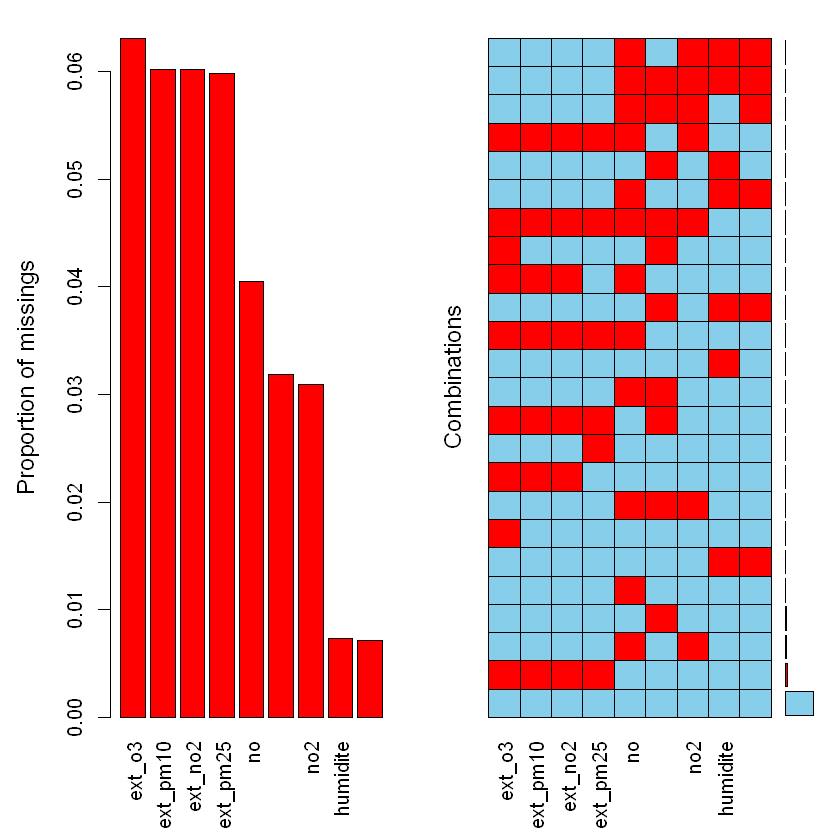

In [36]:
res<-summary(aggr(df_trous,sortVar=TRUE))$combinations

In [37]:
head(res[rev(order(res[,2])),])

Combinations      Count Percent   
1  0:0:0:0:0:0:0:0:0 42193 86.0607420
5  0:0:0:0:0:1:1:1:1  2737  5.5826381
15 0:1:1:0:0:0:0:0:0  1373  2.8004977
6  0:0:0:0:1:0:0:0:0  1298  2.6475208
11 0:1:0:0:0:0:0:0:0   404  0.8240357
19 1:0:0:1:0:0:0:0:0   338  0.6894160

Influence de l'absence des valeurs d'un variable dans d'autres variables

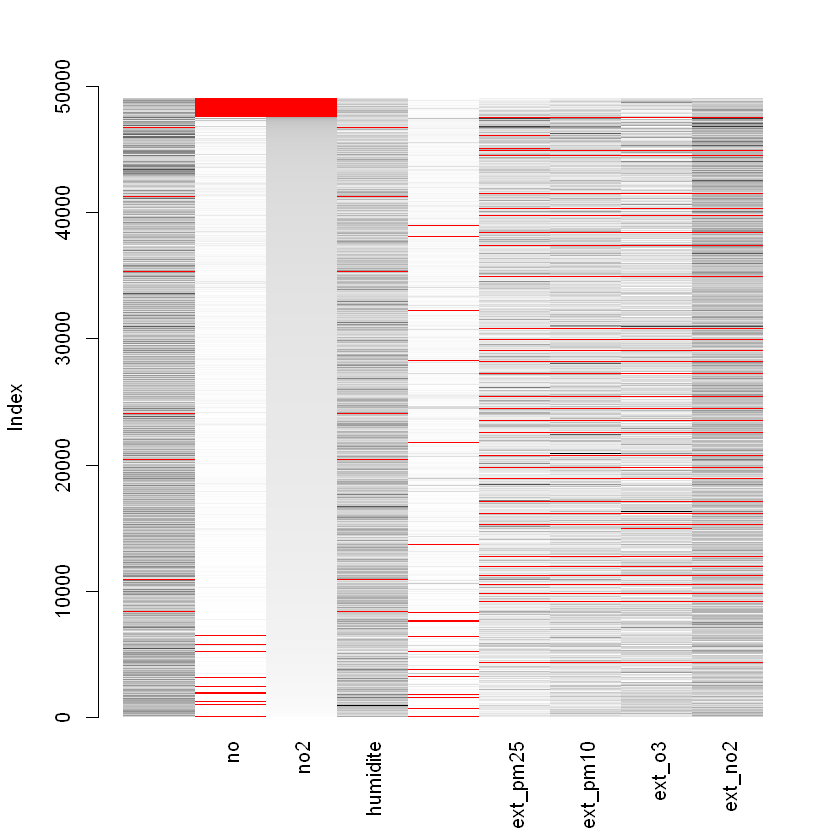

In [38]:
matrixplot(df_trous,sortby = 3)

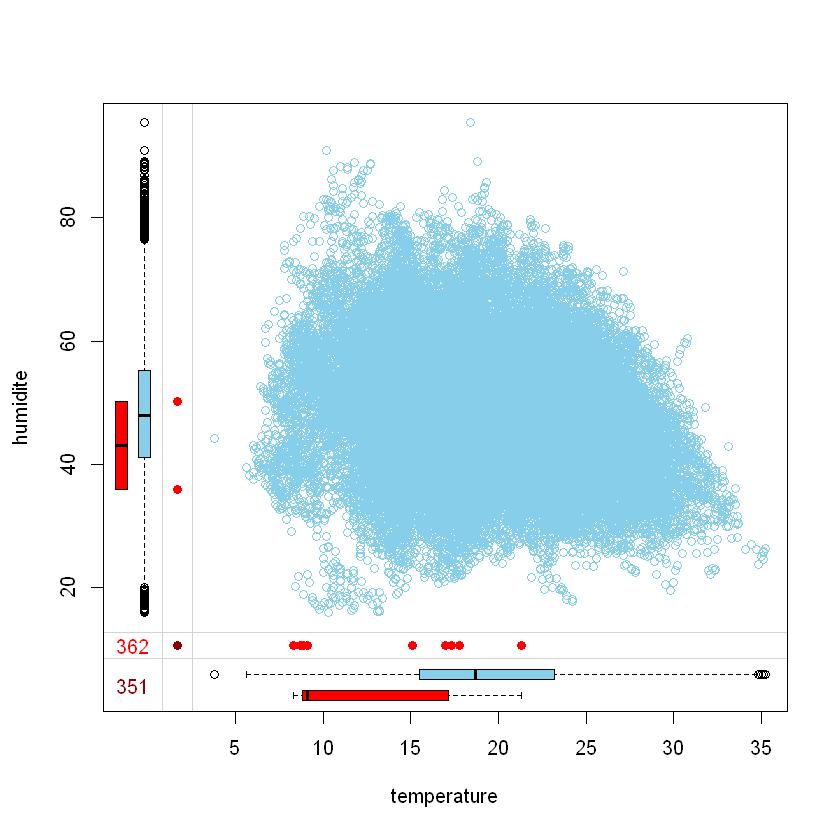

In [39]:
marginplot(df_trous[,c("temperature","humidite")])

Beaucoup de différence entre la température quand il manque l'humidité et quand elle est présente. Valeurs manquantes MAR ?? 

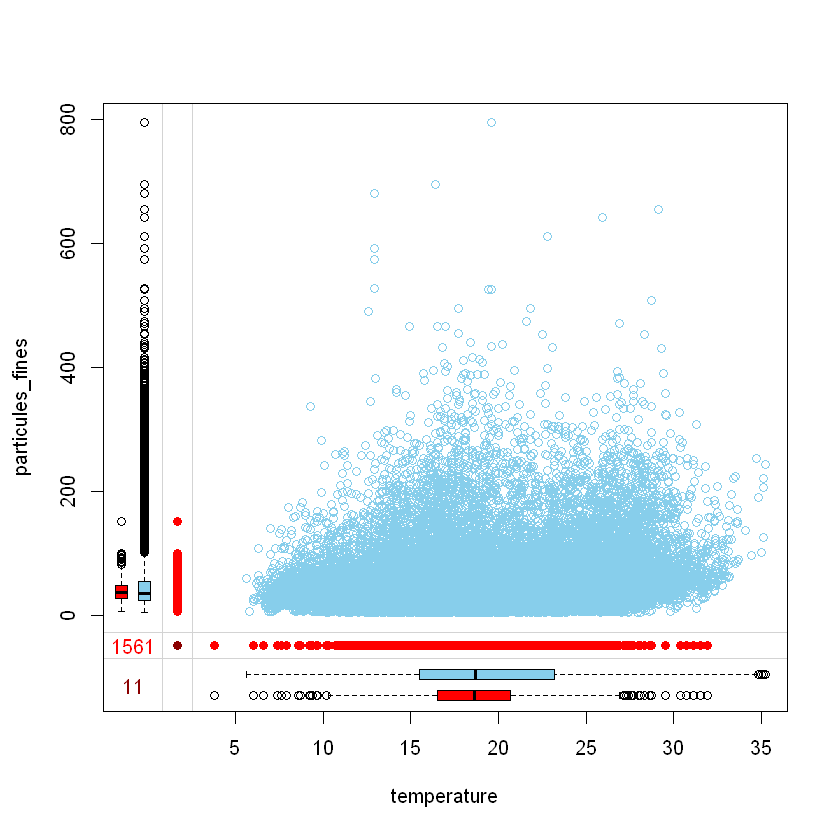

In [40]:
marginplot(df_trous[,c("temperature","particules_fines")])

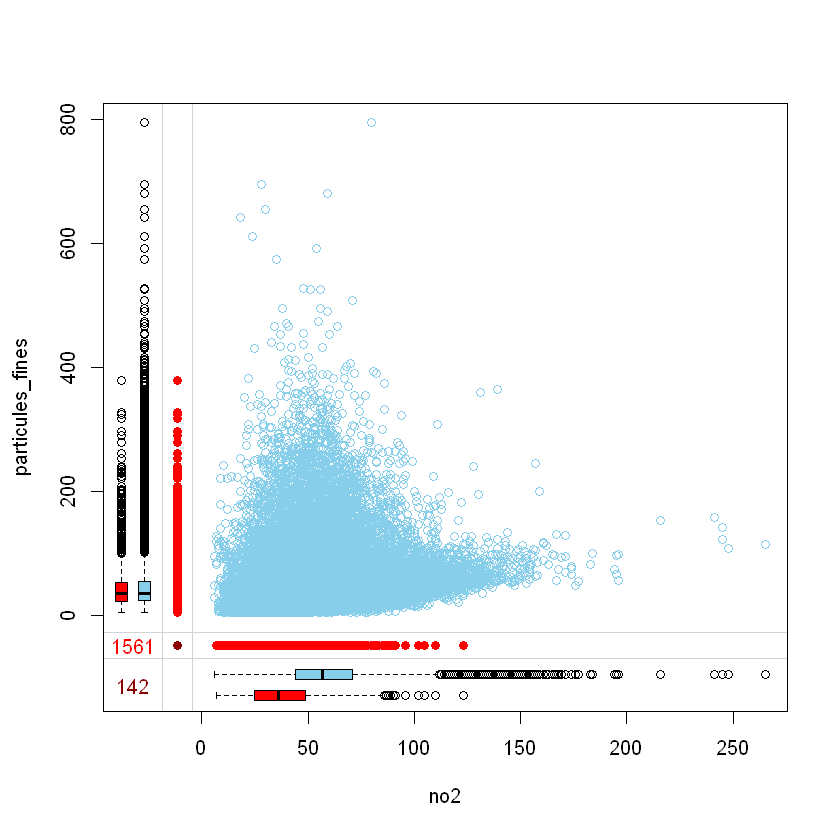

In [41]:
marginplot(df_trous[,c("no2","particules_fines")])

Valeurs manquantes MAR ?

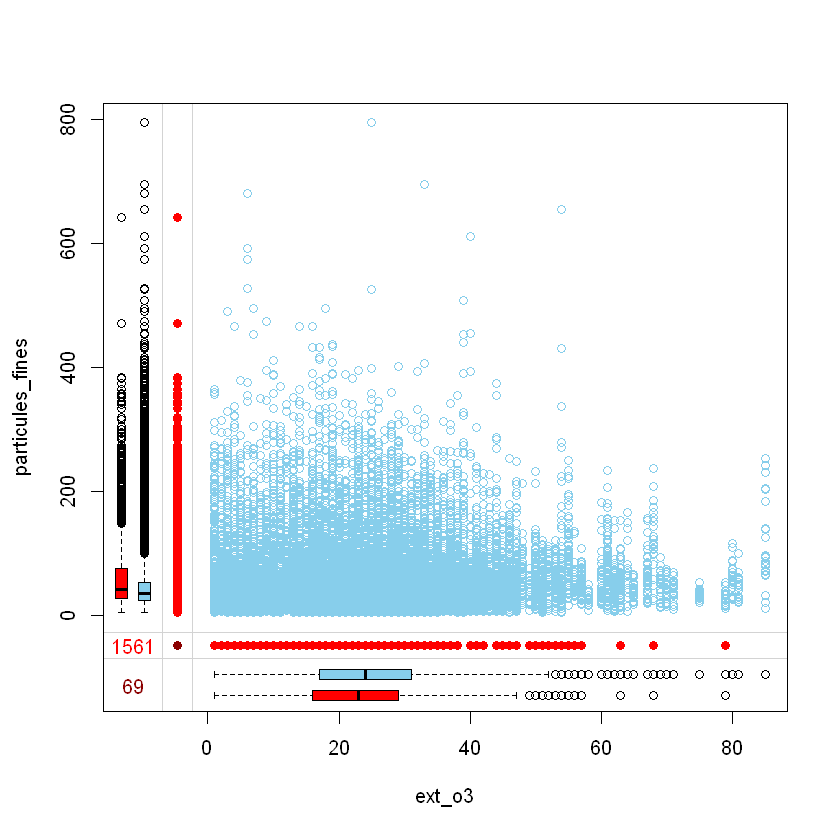

In [42]:
marginplot(df_trous[,c("ext_o3","particules_fines")])

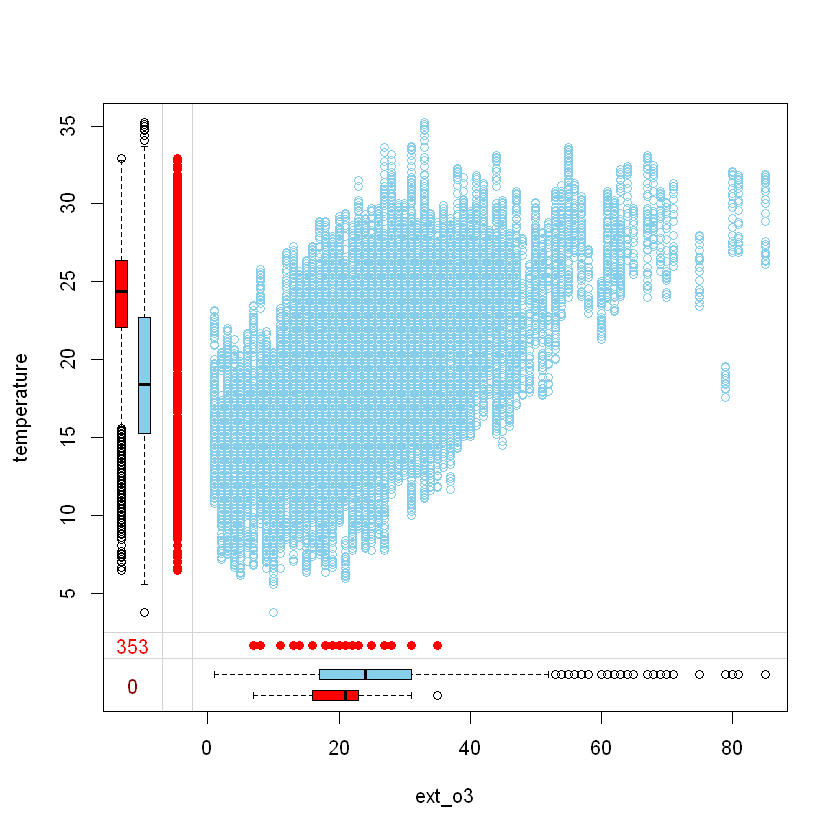

In [43]:
marginplot(df_trous[,c("ext_o3","temperature")])

#### Analyse de correspondance multiple : 

Préparation de la matrix de correspondance

In [44]:
tabNA<-matrix("p",nrow=nrow(df_trous),ncol=ncol(df_trous))
tabNA[is.na(df_trous)]<-"a"
dimnames(tabNA)<-dimnames(df_trous)

Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

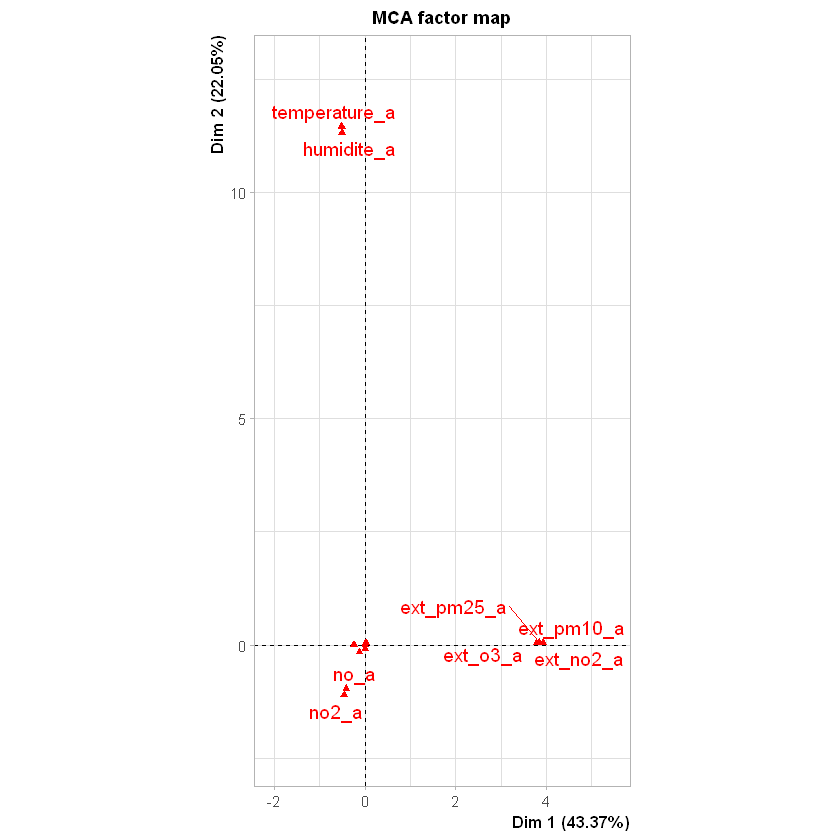

In [45]:
res.mca<-MCA(tabNA,graph=FALSE)
plot(res.mca,invisible="ind")

# Imputations des valeurs manquantes. 

Nous allons adopter deux stratégies différentes, supprimer les 14% des valeurs manquantes ou l'imputation à travers des différentes méthodes de ces valeurs. 

Chaque stratégie aura comme résultat un fichier différent afin de tester les modèles avec les deux stratégies différentes. 

## Suppression des valeurs manquantes

In [46]:
df_clean<-drop_na(df_filt2)
nrow(df_clean)*100/nrow(df_filt2)

[1] 86.06074

## Imputation des valeurs

### Imputation par RF

In [52]:
#install.packages("missForest")
#install.packages("missMDA")
library(missForest)
library(missMDA)

In [48]:
IMPUT_RF=FALSE
if (IMPUT_RF==TRUE)
{
    df_impt_RF<-missForest(df_filt2[vars_trous])
}

### Imputation par PCA

In [53]:
IMPUT_PCA=TRUE
if (IMPUT_PCA==TRUE)
{
    nb<-estim_ncpPCA(df_filt2[vars_trous])
    df_impt_PCA<-imputePCA(df_filt2[vars_trous],ncp=nb$ncp)    
}

temperature no no2 humidite particules_fines ext_pm25 ext_pm10 ext_o3
[1,] 13.5         3 30  62.1     47               43       30       22    
[2,] 13.6         6 41  61.2     38               43       30       22    
[3,] 13.4        31 52  61.0     40               43       30       22    
[4,] 13.3        33 70  59.6     33               43       30       22    
[5,] 13.3        18 53  58.8     29               43       30       22    
[6,] 13.3        13 48  58.2     19               43       30       22    
     ext_no2
[1,] 42     
[2,] 42     
[3,] 42     
[4,] 42     
[5,] 42     
[6,] 42

In [55]:
df_impt_PCA$completeObs[290:300,]

temperature no  no2 humidite particules_fines ext_pm25 ext_pm10 ext_o3
 [1,] 12.6         98 93  48.6     39               62       28       15    
 [2,] 11.3        105 77  63.5     42               66       23       21    
 [3,] 11.6         93 70  63.1     47               66       23       21    
 [4,] 12.4         72 71  65.2     27               66       23       21    
 [5,] 12.6         67 69  66.2     27               66       23       21    
 [6,] 12.8        103 77  67.3     28               66       23       21    
 [7,] 12.8        113 81  68.0     34               66       23       21    
 [8,] 12.7        105 73  69.0     33               66       23       21    
 [9,] 12.9        106 75  70.6     37               66       23       21    
[10,] 13.1         86 69  70.8     37               66       23       21    
[11,] 13.3         67 64  71.3     34               66       23       21    
      ext_no2
 [1,] 48     
 [2,] 46     
 [3,] 46     
 [4,] 46     
 [5,] 46     
 [6,] 46     
 [7,] 46     
 [8,] 46     
 [9,] 46     
[10,] 46     
[11,] 46

## Ecriture des données en disque

In [59]:
write.csv(df_clean,paste(DATA_PATH,DATA_FILE_OUT_CLEAN,sep=""))

In [62]:
if (IMPUT_RF==TRUE)
{
    write.csv(df_impt_RF,paste(DATA_PATH,DATA_FILE_OUT_RF,sep=""))
}

In [63]:
if (IMPUT_PCA==TRUE)
{
    write.csv(df_impt_PCA,paste(DATA_PATH,DATA_FILE_OUT_PCA,sep=""))
}